### Leitura dos dados

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("student_scores.csv")

### Análise Exploratória

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.isna().any()

Hours     False
Scores    False
dtype: bool

In [8]:
import matplotlib.pyplot as plt

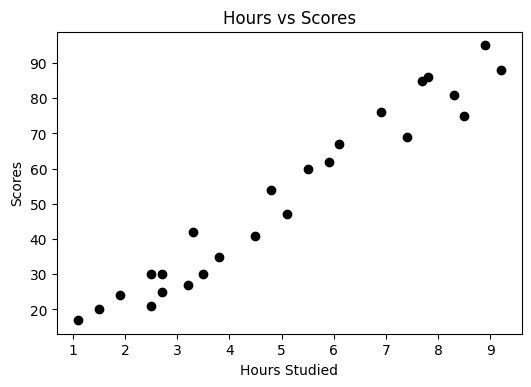

In [12]:
plt.rcParams["figure.dpi"] = 100
plt.scatter(df["Hours"], df["Scores"], color="black")
plt.title("Hours vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.show()

In [13]:
import numpy as np

data_x = np.array(list(df["Hours"])).reshape(-1, 1)
data_y = np.array(list(df["Scores"])).reshape(-1, 1)

### Divisão dos dados para teste e treino

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_treino, x_teste, y_treino, y_teste = train_test_split(data_x, data_y, test_size=0.2)

In [16]:
print("Treino:", len(x_treino))
print("Teste:", len(x_teste))

Treino: 20
Teste: 5


### Criação do modelo

In [17]:
from sklearn import linear_model

In [19]:
modelo = linear_model.LinearRegression()
modelo.fit(x_treino, y_treino)

LinearRegression()

In [20]:
print("Coeficiente:", modelo.coef_)

Coeficiente: [[9.84681445]]


### Predições

In [21]:
y_predicao = modelo.predict(x_teste)

In [22]:
y_predicao

array([[49.9051468 ],
       [37.10428801],
       [21.34938488],
       [46.95110246],
       [75.50686438]])

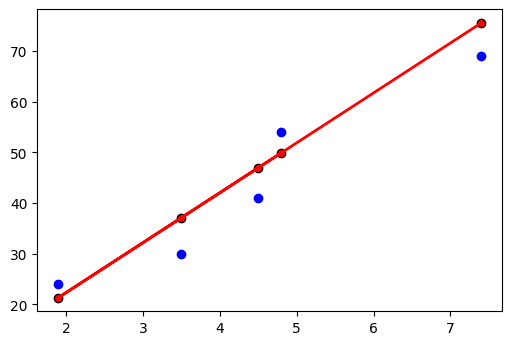

In [29]:
plt.scatter(x_teste, y_predicao, color="red", edgecolors="black")
plt.scatter(x_teste, y_teste, color="blue")
plt.plot(x_teste, y_predicao, color="red", linewidth=2)
plt.show()

### Métrica de avaliação

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
mse = mean_squared_error(y_teste, y_predicao)

In [33]:
print("MSE:", mse)

MSE: 30.40387917205386


### Predição do usuário

In [34]:
pergunta = np.array([6, 8]).reshape(-1, 1)
resposta = modelo.predict(pergunta)

In [37]:
for i in range(2):
  print(f"Horas estudadas {pergunta[1][0]}, terá uma nota {resposta[i][0]}")

Horas estudadas 8, terá uma nota 61.72132414121003
Horas estudadas 8, terá uma nota 81.41495304885296
